In [1]:
"""
HiGH DIMENSIONAL ANALYSIS
PROGRAMMING EXERCISE: 01
Name: Nguyen Duc Vu Duy
Student code: 18110004
"""

'\nHiGH DIMENSIONAL ANALYSIS\nPROGRAMMING EXERCISE: 01\nName: Nguyen Duc Vu Duy\nStudent code: 18110004\n'

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Import dataset
path='/content/room-temperature.csv'
df=pd.read_csv(path, header=0, index_col=0, parse_dates=True, squeeze=True)
date=df.reset_index()
df.head()

,FrontLeft,FrontRight,BackLeft,BackRight
Date,,,,
2010-04-11 11:30:00,295.2,297.0,295.8,296.3
2010-04-11 12:00:00,296.2,296.4,296.2,296.3
2010-04-11 12:30:00,297.3,297.5,296.7,297.1
2010-04-11 13:00:00,295.9,296.7,297.4,297.0
2010-04-11 13:30:00,297.2,296.5,297.6,297.4


In [4]:
#Describe the dataset
df.describe()

,FrontLeft,FrontRight,BackLeft,BackRight
count,144.000000,144.000000,144.00000,144.000000
mean,294.507639,294.628472,295.06250,294.977083
std,1.644532,1.715118,1.58771,1.647533
min,290.200000,291.100000,291.90000,292.100000
25%,293.100000,293.300000,293.67500,293.475000
50%,294.400000,294.400000,295.10000,295.000000
75%,295.800000,295.800000,296.32500,296.500000
max,298.100000,299.000000,297.60000,298.200000


###Using the room temperature dataset in file room-temperature.csv

###a) Plot a time series plot for each type of temperature data: FrontLeft, FrontRight, BackLeft and BackRight

Text(0, 0.5, 'BackRight')

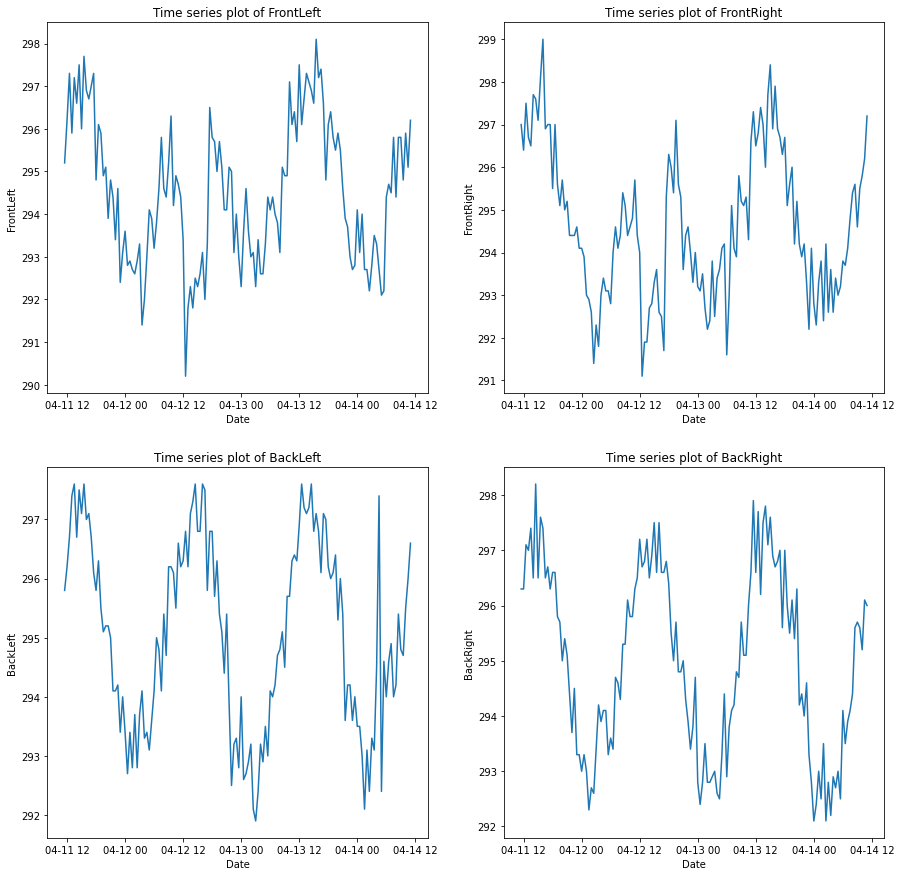

In [5]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)

ax1.plot(df['FrontLeft'])
ax1.set_title('Time series plot of FrontLeft')
ax1.set_xlabel('Date')
ax1.set_ylabel('FrontLeft')

ax2 = fig.add_subplot(222)
ax2.plot(df['FrontRight'])
ax2.set_title('Time series plot of FrontRight')
ax2.set_xlabel('Date')
ax2.set_ylabel('FrontRight')

ax3 = fig.add_subplot(223)
ax3.plot(df['BackLeft'])
ax3.set_title('Time series plot of BackLeft')
ax3.set_xlabel('Date')
ax3.set_ylabel('BackLeft')

ax4 = fig.add_subplot(224)
ax4.plot(df['BackRight'])
ax4.set_title('Time series plot of BackRight')
ax4.set_xlabel('Date')
ax4.set_ylabel('BackRight')

###b) Implement the PCA algorithm to the whole data set

In [6]:
def calculate_covariance(X):
  #Compute covariance matrix
  return np.cov(X.T)

def calculate_eigen(Sigma):
  #Compute eigenvectors and eigenvalues
  return np.linalg.eigh(Sigma)

def PCA_prepare(X, k = None):
  #return the sorted list of pairs of eigenvalues and eigenvectors
  Sigma = calculate_covariance(X)
  eigenvals, eigenvecs = calculate_eigen(Sigma)
  eigenpairs = [(abs(eigenval), eigenvec) for (eigenval, eigenvec) in zip(eigenvals, eigenvecs.T)]
  eigenpairs = sorted(eigenpairs, key = lambda pair: pair[0], reverse = True)
  #We take k first eigenvalues
  if k is None:
    return eigenpairs
  else:
    return eigenpairs[:k]

def construct_W(eigenpairs):
  #Contruct the transform matrix
  eigenvecs = [eigenvec for (_, eigenvec) in eigenpairs]
  W = np.array([e.T for e in eigenvecs])
  return W

def transform(X):
  #Do the standardscaler
  X_std = (X - X.mean(axis = 0))/X.std(axis = 0, ddof = 1)
  return X_std

In [7]:
#Class Principal Component Analysis
class PCA_algorithm:
  def __init__(self,data=df,k=4):
    self.data=data
    self.k=k
  
  def PCA(self):
    eigenpairs=PCA_prepare(transform(self.data),self.k)
    W = construct_W(eigenpairs)
    X_pca = W.dot(transform(self.data).T)
    X_pca = X_pca.T
    return pd.DataFrame(X_pca)

In [8]:
#Perform PCA on the whole dataset
model=PCA_algorithm(data=df.iloc[:,0:],k=4)
X_pca=model.PCA()

[]

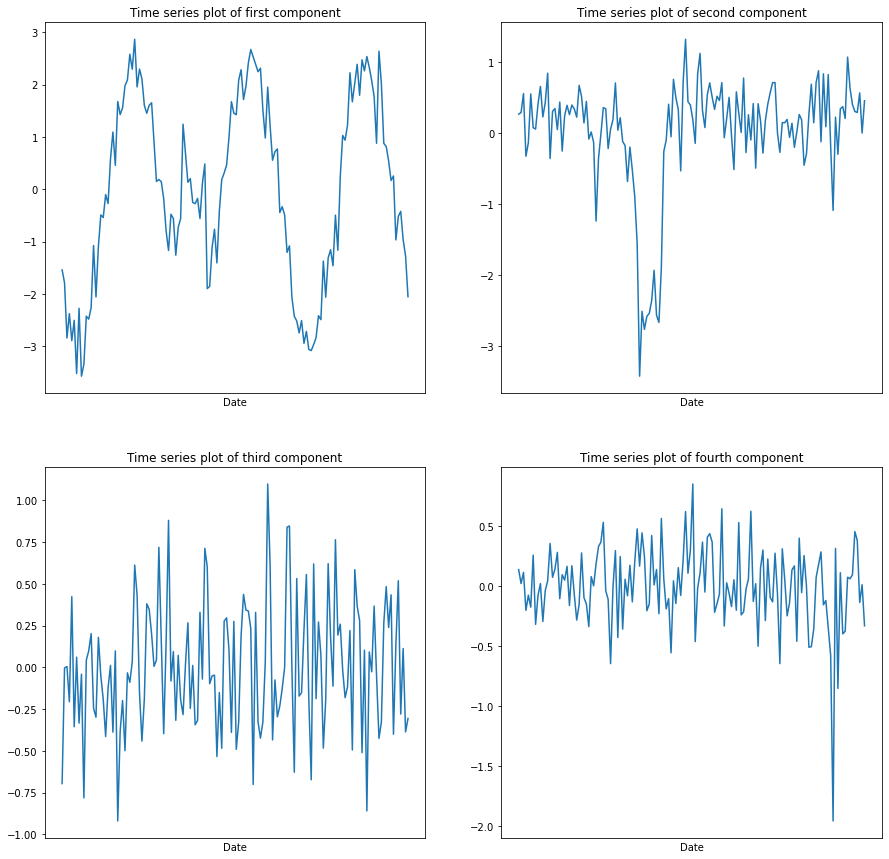

In [9]:
#Plot time series plot on each component
X=pd.concat([date['Date'],X_pca],axis=1)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)

ax1.plot(X.iloc[:,1])
ax1.set_title('Time series plot of first component')
ax1.set_xlabel('Date')
ax1.set_xticks([])

ax2 = fig.add_subplot(222)
ax2.plot(X.iloc[:,2])
ax2.set_title('Time series plot of second component')
ax2.set_xlabel('Date')
ax2.set_xticks([])

ax3 = fig.add_subplot(223)
ax3.plot(X.iloc[:,3])
ax3.set_title('Time series plot of third component')
ax3.set_xlabel('Date')
ax3.set_xticks([])

ax4 = fig.add_subplot(224)
ax4.plot(X.iloc[:,4])
ax4.set_title('Time series plot of fourth component')
ax4.set_xlabel('Date')
ax4.set_xticks([])

###c) After observing these time series plot in a), how many latent variables should we use for the PCA algorithm to keep the most meaningful information? Apply the PCA for the temperature data by your chosen number of latent variables.

In [10]:
#Compute eigenvalues and see the ratio of information
eigenpairs=PCA_prepare(transform(df.iloc[:,0:]),k=4)

eigenvals = [eigenval for (eigenval, _) in eigenpairs]
eigenvals = np.array(eigenvals)
cumsum = np.cumsum(eigenvals)
cumsum /= cumsum[-1]
cumsum
#As we can see, after 2 components, 93.5% of information is illustrated. This number is quite reasonable
#So we will use 2 latent variablé for the most meaningful information.

array([0.7660801 , 0.93504724, 0.97173334, 1.        ])

In [11]:
#Apply PCA with 2 components
model=PCA_algorithm(data=df.iloc[:,0:],k=2)
X_pca_new=model.PCA()

[]

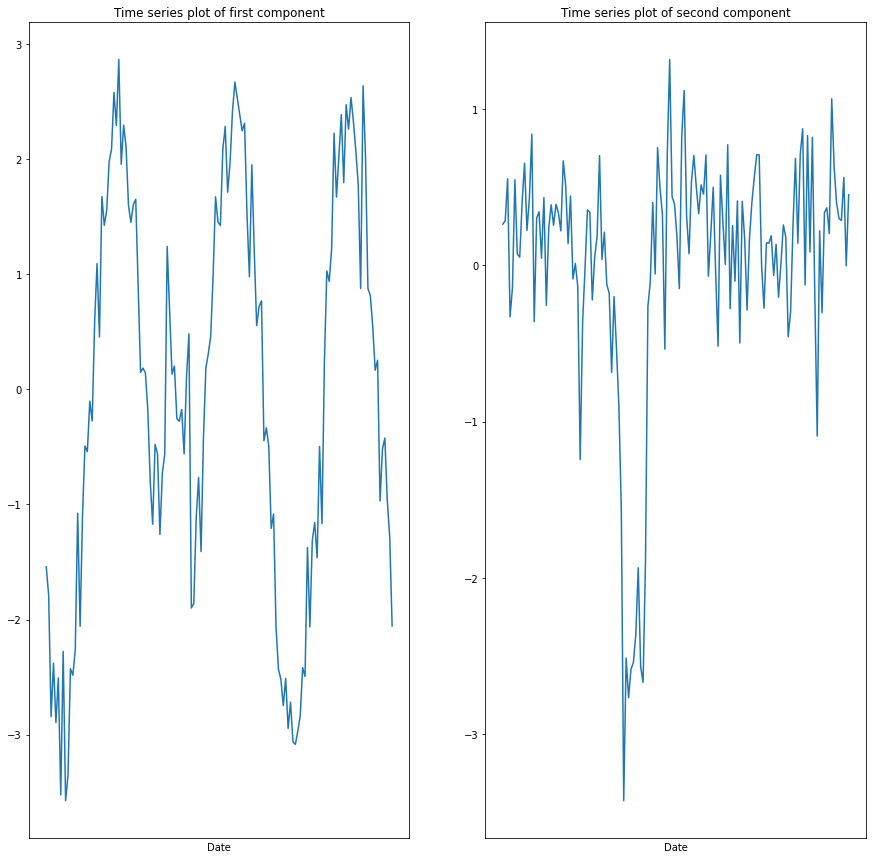

In [12]:
#Plot time series plot on these 2 components
X_new=pd.concat([date['Date'],X_pca_new],axis=1)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)

ax1.plot(X_new.iloc[:,1])
ax1.set_title('Time series plot of first component')
ax1.set_xlabel('Date')
ax1.set_xticks([])

ax2 = fig.add_subplot(122)
ax2.plot(X_new.iloc[:,2])
ax2.set_title('Time series plot of second component')
ax2.set_xlabel('Date')
ax2.set_xticks([])

